## **LDA Muestra - Corte Constitucional**

## **Importación de librerías**

In [1]:
import nltk


# tokenizadores
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import TweetTokenizer

# diccionarios especiales para puntuación y palabras vacias
nltk.download('punkt') # Manejo de puntuación
nltk.download('stopwords')

# wordnet
nltk.download('wordnet')

from nltk.corpus import stopwords

# lematizador basado en WordNet de nltk
from nltk.stem import WordNetLemmatizer 

# steemer de nltk. Raiz de las palabras
#from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer 
import gensim
from gensim.parsing.preprocessing import STOPWORDS
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 


[nltk_data] Downloading package punkt to /home/caicardo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caicardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/caicardo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# manipulación de datos
import pandas as pd
import numpy as np

# conveniencias
from tqdm import tqdm
import os

# proceso de texto
import json
import re
import nltk
import spacy
from string import punctuation

# procesamiento paralelo
from multiprocessing import Pool

# machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from gensim.test.utils import datapath
from gensim.models import FastText

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
# from tqdm.notebook import tnrange, tqdm_notebook, tqdm
from tqdm import tqdm

In [4]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore

In [5]:
from gensim import corpora, models

In [6]:
nltk.download('stopwords')
nlp = spacy.load("es_core_news_md")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caicardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import random

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
import matplotlib.pyplot as plt

## **Definición de funciones**

In [10]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
ABC = 'abcdefghijklmnñopqrstuvwxyzáéíóúü0123456789 '
regex_pattern = "[^{0}{1}_]".format(ABC, ABC.upper())

In [12]:
# abc = 'abcdefghijklmnñopqrstuvwxyzáéíóúü'
# char_remove = [c for c in caracteres if c not in ''.join([abc, abc.upper(), '0123456789', punctuation])]

In [13]:
def old_preprocessor(text):
    """
    preprocesador de texto
    """
    if not isinstance(text, str):
        return ""
    
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~ºª'''
    for char in punctuations:
        text = text.replace(char, " ")
    
    text = re.sub("\s+", " ", text)
    text = text.strip().lower()
    text = re.sub("\d+", "<NUM>", text)
    return text

In [14]:
def preprocessor(text):
    """
    preprocesador de texto
    """
    if not isinstance(text, str):
        return ""
    
    # punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~ºª~^`|'''
    # for char in punctuations:
    #     text = text.replace(char, " ")
    text = re.sub(regex_pattern, " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip().lower()
    text = re.sub("\d+", "<NUM>", text)
    return text

In [15]:
def preprocessor_sentences(text):
    """
    preprocesador de texto con separación de frases por línea.
    """
    if not isinstance(text, str):
        return ""
    # punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~ºª'''
    # for char in punctuations:
    #     text = text.replace(char, " ")
    text = re.sub(regex_pattern, " ", text)
    text = re.sub("\d+", "<NUM>", text)
    text = text.replace("\n\n", "<FIN>")
    text = text.replace(".", "<FIN>")
    text = re.sub("\s+", " ", text)
    text = text.replace("<FIN>", "\n")
    text = "".join([c for c in text if str.isprintable(c) or c=="\n" or c=="."])
    text = re.sub("[\n\r]+", "\n", text)
    text = text.lower()
    text = text.strip("\n ")
    return text

In [16]:
def wv_vectorizer(text):
    """
    Calcula el vector promedio de las palabras de la frase.
    """
    text = preprocessor(text)
    vec_list = []
    for word in [w for w in text.split() if w not in es_stopwords]:
        vec_list.append(model.wv[word])
    vec_list = np.array(vec_list)
    vec = np.mean(vec_list, axis=0)
    return vec

In [17]:
def remove_stopwords(text):
    tokens = text.split()
    out = " ".join([word for word in tokens if word not in es_stopwords])
    return out

In [18]:
def lemmatize(text):
    nlp_tokens = nlp(text)
    lemma = [w.lemma_ for w in nlp_tokens]
    lemma = " ".join(lemma)
    return lemma
    

In [19]:
def transform_token(token):
    if token.is_stop:
        return "<STOP>" + token.text
    if token.pos_!= 'PROPN':
        return token.lemma_
    return token.text


def full_preprocess(text, debug=False):
    """
    Performs lemmatization, stopword removal via spacy and custom list and preprocessing
    """
    text = re.sub("\s+", " ", text)
    nlp_tokens = nlp(text)
    mask = [w.pos_ for w in nlp_tokens]
    spacy_pp = [transform_token(w) for w in nlp_tokens]

    joint_spp = spacy_pp[0]
    for i in range(1, len(mask)):
        joint_spp = "".join([joint_spp, "_" if (mask[i]=='PROPN' and mask[i-1]=='PROPN') else " ", spacy_pp[i]])

    joint_spp = " ".join([w for w in joint_spp.split() if not w.startswith("<STOP>")])

    preprocessed = preprocessor(joint_spp)

    out = remove_stopwords(preprocessed)
    return out


## **Configuración**

In [20]:
RANDOM_STATE = 42
N_TOP_DOCS = 5
CARACTERES = 500

In [21]:
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

In [22]:
DATA_PATH = "data/DOCUMENTS_SAMPLE_RESUME_TEXTRANK.csv"

In [23]:
es_stopwords = nltk.corpus.stopwords.words("spanish")

In [24]:
es_stopwords.remove("no")

In [25]:
es_stopwords.append("<NUM>")

## **Lectura de datos**

In [26]:
df = pd.read_csv(DATA_PATH)

In [27]:
df.head()

,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK
0,A009-15,Auto 009/15\n\n\nSENTENCIA DE LA CORTE CONSTIT...,Auto 009/15 SENTENCIA DE LA CORTE CONSTITUCI...,Auto 009/15 SENTENCIA DE LA CORTE CONSTITUCI...
1,T-243-07,Sentencia T-243/07\n\nDERECHO A LA MATERNIDAD-...,Sentencia T-243/07 DERECHO A LA MATERNIDAD-Pr...,Sentencia T-243/07 DERECHO A LA MATERNIDAD-Pr...
2,C-747-12,"Sentencia C-747/12\n(Bogotá DC, 6 de Sept...","Sentencia C-747/12 (Bogotá DC, 6 de Septi...","Sentencia C-747/12 (Bogotá DC, 6 de Septiembre..."
3,C-089-14,Sentencia C-089/14\n\n\nACUERDO INTERNACIONAL ...,Sentencia C-089/14 ACUERDO INTERNACIONAL DEL...,Sentencia C-089/14 ACUERDO INTERNACIONAL DEL...
4,T-303-11,Sentencia T-303/11\n\nACCION DE TUTELA-Procede...,Sentencia T-303/11 ACCION DE TUTELA-Procedenc...,El contrato de trabajo puede ser verbal y el c...


In [28]:
print(f"Cantidad de Documentos: {len(df)}")
print(f"Cantidad de Documentos con resumen no nulo: {len(df[df.RESUME_TEXTRANK.notnull()])}")
print(f"Cantidad de Documentos con resumen tipo str: {len(df[[isinstance(x, str) for x in df.RESUME_TEXTRANK.values]])}")

Cantidad de Documentos: 3573
Cantidad de Documentos con resumen no nulo: 3573
Cantidad de Documentos con resumen tipo str: 3573


## Stats

In [29]:
print("Cantidad de documentos: {}".format(len(df.INDEX.unique())))

Cantidad de documentos: 3573


In [30]:
df["word_count"] = [len(x.strip().split()) for x in df.RESUME_TEXTRANK.values]

In [31]:
max_wc = np.max(df.word_count)
max_wc_p = df[df.word_count==max_wc].iloc[0].to_dict()
print("Características del documento (resumen) más largo:")
print("- Sentencia {0}.".format(max_wc_p["INDEX"]))
print("- El resumen contiene {} palabras.".format(max_wc_p["word_count"]))
print("- El documento completo contiene {} palabras.".format(len(max_wc_p["TEXT_PLAIN"].strip().split())))

Características del documento (resumen) más largo:
- Sentencia C-007-18.
- El resumen contiene 93442 palabras.
- El documento completo contiene 231538 palabras.


In [38]:
print(max_wc_p["RESUME_TEXTRANK"].replace("\n", "\n\n"))

Sentencia C-007/18  INSTRUMENTOS PARA FACILITAR Y ASEGURAR LA IMPLEMENTACION Y DESARROLLO NORMATIVO DEL ACUERDO FINAL PARA LA TERMINACION DEL CONFLICTO Y CONSTRUCCION DE UNA PAZ ESTABLE Y DURADERA-Procedimiento legislativo especial para la paz (fast track)  NORMA SOBRE AMNISTIA, INDULTO Y TRATAMIENTOS ESPECIALES EN EL MARCO DEL ACUERDO FINAL PARA LA TERMINACION DEL CONFLICTO Y CONSTRUCCION DE UNA PAZ ESTABLE Y DURADERA-Competencia del Congreso y procedimiento especial surtido para su trámite y aprobación   PAZ-Derecho, deber y fin constitucional/PAZ EN EL ORDEN CONSTITUCIONAL-Alcance/DERECHO A LA PAZ EN EL DERECHO INTERNACIONAL-Propósito fundamental/DERECHO A LA PAZ-Dimensiones/PAZ-Importancia constitucional/PAZ-Eje identitario de la Constitución/PAZ-Valor no absoluto  JUSTICIA EN EL ORDEN CONSTITUCIONAL/JUSTICIA-Fundamento y fin esencial del Estado/JUSTICIA-Condición de validez y elemento identitario del ordenamiento constitucional   JUSTICIA Y PAZ-Relación de tensión y complementarie

## **Preprocesamiento de texto (para TF-IDF)**

Como el preprocesamiento no toma tanto tiempo, no hay problema en repetirlo, pero en general no es necesario volver a preprocesar los datos, se pueden guardar descomentando el código más abajo.

In [32]:
%%time
with Pool(8) as my_pool:
    pp_list = my_pool.map(full_preprocess, df.RESUME_TEXTRANK.values)

CPU times: user 330 ms, sys: 209 ms, total: 539 ms
Wall time: 4min 33s


In [37]:
df["pp"] = pp_list

In [38]:
df.head()

,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK,word_count,pp
0,A009-15,Auto 009/15\n\n\nSENTENCIA DE LA CORTE CONSTIT...,Auto 009/15 SENTENCIA DE LA CORTE CONSTITUCI...,Auto 009/15 SENTENCIA DE LA CORTE CONSTITUCI...,68633,auto_<NUM> <NUM>_sentencia corte_constituciona...
1,T-243-07,Sentencia T-243/07\n\nDERECHO A LA MATERNIDAD-...,Sentencia T-243/07 DERECHO A LA MATERNIDAD-Pr...,Sentencia T-243/07 DERECHO A LA MATERNIDAD-Pr...,2600,sentencia_t <NUM>_derecho maternidad protecció...
2,C-747-12,"Sentencia C-747/12\n(Bogotá DC, 6 de Sept...","Sentencia C-747/12 (Bogotá DC, 6 de Septi...","Sentencia C-747/12 (Bogotá DC, 6 de Septiembre...",2260,sentencia_c bogotá_dc septiembre cesion totali...
3,C-089-14,Sentencia C-089/14\n\n\nACUERDO INTERNACIONAL ...,Sentencia C-089/14 ACUERDO INTERNACIONAL DEL...,Sentencia C-089/14 ACUERDO INTERNACIONAL DEL...,11461,sentencia c cafe ajustar constitución político...
4,T-303-11,Sentencia T-303/11\n\nACCION DE TUTELA-Procede...,Sentencia T-303/11 ACCION DE TUTELA-Procedenc...,El contrato de trabajo puede ser verbal y el c...,6967,contrato verbal contrato colectivo sindical es...


**Guardar datos preprocesados**

In [39]:
df.to_csv("data/resumenes_dump_pp_20210512.csv")

## Para datos ya preprocesados, empezar acá

In [26]:
df = pd.read_csv("data/resumenes_dump_pp_20210512.csv")

In [27]:
len(df)

3573

In [28]:
df.head()

,Unnamed: 0,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK,word_count,pp
0,0,A009-15,Auto 009/15\n\n\nSENTENCIA DE LA CORTE CONSTIT...,Auto 009/15 SENTENCIA DE LA CORTE CONSTITUCI...,Auto 009/15 SENTENCIA DE LA CORTE CONSTITUCI...,68633,auto_<NUM> <NUM>_sentencia corte_constituciona...
1,1,T-243-07,Sentencia T-243/07\n\nDERECHO A LA MATERNIDAD-...,Sentencia T-243/07 DERECHO A LA MATERNIDAD-Pr...,Sentencia T-243/07 DERECHO A LA MATERNIDAD-Pr...,2600,sentencia_t <NUM>_derecho maternidad protecció...
2,2,C-747-12,"Sentencia C-747/12\n(Bogotá DC, 6 de Sept...","Sentencia C-747/12 (Bogotá DC, 6 de Septi...","Sentencia C-747/12 (Bogotá DC, 6 de Septiembre...",2260,sentencia_c bogotá_dc septiembre cesion totali...
3,3,C-089-14,Sentencia C-089/14\n\n\nACUERDO INTERNACIONAL ...,Sentencia C-089/14 ACUERDO INTERNACIONAL DEL...,Sentencia C-089/14 ACUERDO INTERNACIONAL DEL...,11461,sentencia c cafe ajustar constitución político...
4,4,T-303-11,Sentencia T-303/11\n\nACCION DE TUTELA-Procede...,Sentencia T-303/11 ACCION DE TUTELA-Procedenc...,El contrato de trabajo puede ser verbal y el c...,6967,contrato verbal contrato colectivo sindical es...


#### Ejemplo preproceso

In [29]:
# Ejemplo
id_ejemplo = 687
print("Original:\n{}".format(df.iloc[id_ejemplo].RESUME_TEXTRANK))
print("-*"*20)
print("Preprocesado:\n{}".format(df.iloc[id_ejemplo].RESUME_TEXTRANK))
print("-*"*20)
print("Quitar palabras vacías (stop words):\n{}".format(remove_stopwords(df.iloc[id_ejemplo].RESUME_TEXTRANK)))
print("-*"*20)
print("Lematización:\n{}".format(lemmatize(remove_stopwords(df.iloc[id_ejemplo].RESUME_TEXTRANK))))
print("-*"*20)
print("Full Preprocess:\n{}".format(full_preprocess(df.iloc[id_ejemplo].RESUME_TEXTRANK)))

Original:
_Sentencia T-547/98    ACCION DE TUTELA CONTRA PARTICULARES-Procedencia excepcional  SUBORDINACION LABORAL-Alcance  DERECHO AL TRABAJO-Fundamental  DERECHO DEL TRABAJADOR AL SALARIO-Alcance  MEDIO DE DEFENSA JUDICIAL-Demora en pago de salarios que no afecta derecho fundamental  PRINCIPIO A TRABAJO IGUAL SALARIO IGUAL-Libertad de opción en sistema de cesantías  MEDIO DE DEFENSA JUDICIAL-Incremento salarial  PREVENCION EN TUTELA-Pago oportuno de salarios/DERECHO A LA SALUD-Fundamental por conexidad  Respecto del derecho a la salud, tiene establecido la jurisprudencia, que este adquiere su condición de fundamental cuando se encuentra en conexidad con otros que ostenten la calidad de tal, como lo son la vida, la dignidad humana, la integridad personal y el trabajo en razón a la relación inescindible que en determinadas circunstancias puedan presentar con éstos.
ANTONIO BARRERA CARBONELL y ALFREDO BELTRÁN SIERRA, en ejercicio de sus competencias constitucionales y legales, previo 

### Verificaciones de textos vacíos

In [30]:
df[df.pp.isnull()]

,Unnamed: 0,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK,word_count,pp


In [31]:
df[df.pp==""]

,Unnamed: 0,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK,word_count,pp


In [32]:
df = df[df.pp.notnull()].copy()

In [33]:
len(df)

3573

In [34]:
df[~np.array([isinstance(x, str) for x in df.pp.values])]

,Unnamed: 0,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK,word_count,pp


In [35]:
df = df[[isinstance(x, str) for x in df.pp.values]].copy()

## LDA

In [36]:
df["lemma_stop"] = df["pp"]

In [37]:
df[[isinstance(a, float) for a in df.lemma_stop.values]]

,Unnamed: 0,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK,word_count,pp,lemma_stop


In [38]:
df = df[[isinstance(a, str) for a in df.lemma_stop.values]]

In [39]:
df[df.lemma_stop.str.contains("\n")]

,Unnamed: 0,INDEX,TEXT,TEXT_PLAIN,RESUME_TEXTRANK,word_count,pp,lemma_stop


In [40]:
corpus_path = "cc_lemma_corpus_resumen.txt"

In [41]:
df.lemma_stop.to_csv(corpus_path, index=False, header=False)

In [42]:
class MyCorpus:
    def __init__(self, file_path: str, dictionary):
        self.dictionary = dictionary
        self.file_path = file_path
    def __iter__(self):
        for line in open(self.file_path):
            # assume there's one document per line, tokens separated by whitespace
            yield self.dictionary.doc2bow(line.lower().strip().split())


In [43]:
%%time
cc_dict = corpora.Dictionary(line.lower().strip().split() for line in open(corpus_path))

CPU times: user 2.63 s, sys: 6.94 ms, total: 2.64 s
Wall time: 2.64 s


In [44]:
len(cc_dict)

76938

In [45]:
cc_dict.filter_extremes(no_above=0.5, keep_n=200000)
cc_dict.compactify()  # remove gaps in id sequence after words that were removed

In [46]:
len(cc_dict)

14734

## Quitar palabras cortas

In [47]:
word_set = list(set([w for doc in df.pp.values for w in doc.strip().split()]))

In [48]:
word_len = [(w, len(w)) for w in word_set]

In [49]:
short_words = [word for word, length in word_len if length<3]

In [50]:
len(short_words)

295

In [51]:
short_words = [w for w in short_words if w in cc_dict.token2id.keys()]
short_ids = [cc_dict.token2id[w] for w in short_words]

In [52]:
cc_dict.filter_tokens(bad_ids=short_ids)
cc_dict.compactify()

In [53]:
len(cc_dict)

14628

## Train LDA

In [54]:
light_corpus = MyCorpus(corpus_path, cc_dict)

In [55]:
%%time
tfidf = models.TfidfModel(light_corpus)

CPU times: user 2 s, sys: 11.5 ms, total: 2.02 s
Wall time: 2.02 s


In [56]:
class TfidfCorpus:
    def __init__(self, corpus, model):
        self.corpus = corpus
        self.model = model
    def __iter__(self):
        for line in self.corpus:
            # assume there's one document per line, tokens separated by whitespace
            yield self.model[line]


In [57]:
corpus_tfidf = TfidfCorpus(light_corpus, tfidf)

In [74]:
%%time
# Train the model on the corpus.
lda = LdaMulticore(corpus_tfidf,
                   id2word=cc_dict,
                   num_topics=8,
                   workers=4,
                   per_word_topics=True,
                   random_state=RANDOM_STATE,
                   passes=1)

CPU times: user 25.9 s, sys: 17.5 s, total: 43.3 s
Wall time: 23.5 s


In [59]:
x=lda.show_topics(num_topics=8, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
# for topic,words in topics_words:
#     print(" ".join(words))


0::['pensión', 'conflicto', 'auto', 'bogotá', 'nulidad', 'circuito', 'reparto', 'laboral', 'administrativo', 'señor']
1::['salud', 'pensión', 'pago', 'pensional', 'mesada', 'licencia', 'maternidad', 'laboral', 'médico', 'medicamento']
2::['salud', 'pensión', 'nulidad', 'laboral', 'familia', 'médico', 'circuito', 'bogotá', 'tribunal_superior', 'menor']
3::['salud', 'pensión', 'nulidad', 'pensional', 'médico', 'servicio', 'conflicto', 'pago', 'laboral', 'trabajador']
4::['salud', 'pensión', 'pago', 'salario', 'bogotá', 'trabajador', 'laboral', 'nulidad', 'médico', 'servicio']
5::['pensión', 'invalidez', 'salud', 'laboral', 'servicio', 'médico', 'pago', 'semana', 'menor', 'auto']
6::['pensión', 'salud', 'invalidez', 'laboral', 'médico', 'pago', 'servicio', 'contrato', 'señor', 'empresa']
7::['salud', 'médico', 'pensión', 'servicio', 'menor', 'laboral', 'medicamento', 'tratamiento', 'educación', 'desacato']



In [60]:
%%time
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity([x for x in light_corpus]))  # a measure of how good the model is. lower the better.


Perplexity:  -8.809328060463814
CPU times: user 16.4 s, sys: 45 s, total: 1min 1s
Wall time: 9.07 s


In [72]:
from gensim.models import CoherenceModel

In [87]:
# Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda, texts=df.pp.to_list(), dictionary=cc_dict, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda, texts=df.pp.to_list(), corpus=corpus_tfidf, dictionary=cc_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  nan


/home/caicardo/anaconda3/envs/ml_un/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/home/caicardo/anaconda3/envs/ml_un/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/home/caicardo/anaconda3/envs/ml_un/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs


In [88]:
%%time
corpus_list = [x for x in light_corpus]
perplex_list = []
for i in range(2, 33):
    lda = LdaMulticore(corpus_tfidf,
                       id2word=cc_dict,
                       num_topics=i,
                       workers=4,
                       per_word_topics=True,
                       random_state=RANDOM_STATE,
                       passes=4)
    perplex = lda.log_perplexity(corpus_list)
    perplex_list.append(perplex)
    print('Topics: {0: 2d}\tPerplexity: {1:.4f}'.format(i, perplex))

Topics:  2	Perplexity: -8.4088
Topics:  3	Perplexity: -8.4223
Topics:  4	Perplexity: -8.3552
Topics:  5	Perplexity: -8.3591
Topics:  6	Perplexity: -8.3506
Topics:  7	Perplexity: -8.3879
Topics:  8	Perplexity: -8.3735
Topics:  9	Perplexity: -8.4317
Topics:  10	Perplexity: -8.4320
Topics:  11	Perplexity: -8.4630
Topics:  12	Perplexity: -8.5230
Topics:  13	Perplexity: -8.5669
Topics:  14	Perplexity: -8.5972
Topics:  15	Perplexity: -8.5957
Topics:  16	Perplexity: -8.6778
Topics:  17	Perplexity: -8.7114
Topics:  18	Perplexity: -8.7617
Topics:  19	Perplexity: -8.8215
Topics:  20	Perplexity: -8.8214
Topics:  21	Perplexity: -8.8910
Topics:  22	Perplexity: -8.8797
Topics:  23	Perplexity: -8.9826
Topics:  24	Perplexity: -9.0493
Topics:  25	Perplexity: -9.0713
Topics:  26	Perplexity: -9.0609
Topics:  27	Perplexity: -9.1561
Topics:  28	Perplexity: -9.2326
Topics:  29	Perplexity: -9.2664
Topics:  30	Perplexity: -9.3217
Topics:  31	Perplexity: -9.3334
Topics:  32	Perplexity: -9.3820
CPU times: user 

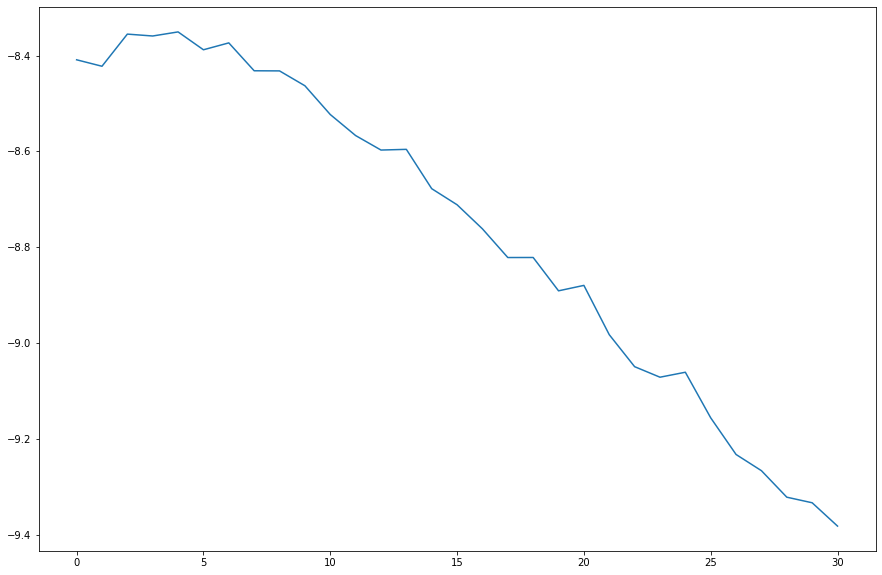

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.plot(perplex_list)
plt.show()

In [68]:
%%time
# Train the model on the corpus.
lda2 = LdaMulticore(corpus_tfidf,
                   id2word=cc_dict,
                   num_topics=16,
                   workers=4,
                   per_word_topics=True,
                   random_state=RANDOM_STATE,
                   passes=1)

CPU times: user 28.5 s, sys: 32.8 s, total: 1min 1s
Wall time: 23.5 s


In [70]:
x=lda2.show_topics(num_topics=-1, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
# for topic,words in topics_words:
#     print(" ".join(words))


0::['conflicto', 'nulidad', 'pensión', 'auto', 'judicatura', 'reparto', 'circuito', 'señor', 'bogotá', 'pensional']
1::['salud', 'pensión', 'pago', 'laboral', 'maternidad', 'servicio', 'vivienda', 'licencia', 'médico', 'señora']
2::['salud', 'pensión', 'pago', 'medicamento', 'médico', 'invalidez', 'servicio', 'laboral', 'nulidad', 'pensional']
3::['salud', 'pensión', 'nulidad', 'conflicto', 'médico', 'laboral', 'servicio', 'invalidez', 'pensional', 'menor']
4::['salud', 'salario', 'pago', 'médico', 'inconstitucionalidad', 'pensión', 'servicio', 'demanda', 'conflicto', 'proyecto']
5::['salud', 'pensión', 'médico', 'invalidez', 'laboral', 'servicio', 'contrato', 'medicamento', 'menor', 'pago']
6::['salud', 'pensión', 'invalidez', 'médico', 'laboral', 'servicio', 'medicamento', 'señor', 'pago', 'contrato']
7::['salud', 'médico', 'servicio', 'pago', 'carrera', 'licencia', 'bogotá', 'menor', 'maternidad', 'pensión']
8::['salud', 'pensión', 'conflicto', 'médico', 'servicio', 'contrato', 'nul

In [71]:
%%time
# Compute Perplexity
print('\nPerplexity: ', lda2.log_perplexity([x for x in light_corpus]))  # a measure of how good the model is. lower the better.


Perplexity:  -9.276933806489497
CPU times: user 23.8 s, sys: 1min 21s, total: 1min 44s
Wall time: 10.6 s


In [120]:
# frase = "Deberes y atribuciones del juez para obtener la prueba genética ADN"
frase = "Acceso a la salud del adulto mayor"

In [28]:
bow_busqueda = cc_dict.doc2bow(frase.split())

print(lda.get_document_topics(bow_busqueda))

[(0, 0.03125019), (1, 0.03125019), (2, 0.03125019), (3, 0.03125019), (4, 0.03125019), (5, 0.6981773), (6, 0.11432161), (7, 0.03125019)]


In [ ]:
topn_words = {'Topic_' + str(i): [word for word, prob in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}

In [ ]:
topn_words

In [ ]:
for i in range(8):
    print(i, lda.show_topic(i))

In [ ]:
lda.print_topics(num_topics=8, num_words=10)

In [56]:
df[df.pp.str.contains("problema jurídico")|df.pp.str.contains("pregunta jurídica")]

,INDEX,DOCUMENT_TYPE,LINK,DOCUMENT,DOCUMENT_WITH_SIGNS,DOCUMENT_CLEAN,tipo,pp
52,A475-20,A,https://www.corteconstitucional.gov.co/Relator...,auto 47520\n \n \nreferencia: expediente d-113...,auto 47520 referencia: expediente d-11306 dem...,auto 47520 referencia expediente d 11306 deman...,A,auto <NUM> referencia expediente d <NUM> deman...
58,A469-20,A,https://www.corteconstitucional.gov.co/Relator...,auto 46920\n \n \nexpediente: d-13967\n \nasun...,auto 46920 expediente: d-13967 asunto: recurs...,auto 46920 expediente d 13967 asunto recurso d...,A,auto <NUM> expediente d <NUM> asunto recurso d...
84,A440-20,A,https://www.corteconstitucional.gov.co/Relator...,auto\r\n44020\n \n \nreferencia: expediente\r\...,auto 44020 referencia: expediente t-7785975 a...,auto 44020 referencia expediente t 7785975 acc...,A,auto <NUM> referencia expediente t <NUM> acció...
114,A406-20,A,https://www.corteconstitucional.gov.co/Relator...,auto\r\n40620\n \n \nexpediente: d-12329\n \nr...,auto 40620 expediente: d-12329 referencia: so...,auto 40620 expediente d 12329 referencia solic...,A,auto <NUM> expediente d <NUM> referencia solic...
118,A402-20,A,https://www.corteconstitucional.gov.co/Relator...,auto 40220\n \n \nexpediente d-13808\n \nsolic...,auto 40220 expediente d-13808 solicitud de me...,auto 40220 expediente d 13808 solicitud de med...,A,auto <NUM> expediente d <NUM> solicitud de med...
...,...,...,...,...,...,...,...,...
34106,C-345-93,C,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia\r\nno. c-3...,sentencia no sentencia no. c-34593 cosa juzga...,sentencia no sentencia no c 34593 cosa juzgada...,C,sentencia no sentencia no c <NUM> cosa juzgada...
34242,C-005-93,C,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia\r\nc-00593...,sentencia no sentencia c-00593 juegos electron...,sentencia no sentencia c 00593 juegos electron...,C,sentencia no sentencia c <NUM> juegos electron...
34268,T-581-92,T,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no.\r\nt-5...,sentencia no sentencia no. t-58192 derecho al ...,sentencia no sentencia no t 58192 derecho al t...,T,sentencia no sentencia no t <NUM> derecho al t...
34270,T-577-92,T,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no.\r\nt-5...,sentencia no sentencia no. t-57792 banco de da...,sentencia no sentencia no t 57792 banco de dat...,T,sentencia no sentencia no t <NUM> banco de dat...


In [58]:
df.iloc[0].DOCUMENT.split("\n\n")

['auto 10721\n\xa0\n\xa0\nreferencia: expediente t-7.909.170 ac.\n\xa0\nacción\r\nde tutela promovida por carmen alicia rodríguez berrío y otros contra holding\r\ninmobiliaria y otros.\n\xa0\nasunto:\r\nsolicitud de\r\ncumplimiento de la sentencia t-020 de 2021.\n\xa0\npeticionaria:\r\ncarmen alicia rodríguez berrío.\n\xa0\nmagistrada\r\nsustanciadora:\ngloria\r\nstella ortiz delgado.\n\xa0\n\xa0\nbogotá,\r\nd.c., nueve (9) de marzo de dos mil veintiuno (2021).\n\xa0\n\xa0\nla\r\nsuscrita magistrada sustanciadora, en ejercicio de sus competencias\r\nconstitucionales y legales, profiere el presente auto con fundamento en los\r\nsiguientes:\nantecedentes\n\xa0\n1. el pasado 27 de enero, la sala\r\nsexta de revisión profirió la sentencia t-020 de 2021[1]. en el caso\r\nparticular de la señora carmen alicia, dicha providencia concedió el amparo de los derechos a la estabilidad laboral reforzada y al mínimo\r\nvital. \n\xa0\n2. en consecuencia, esta corporación le ordenó a holding\r\ninmobi

## **Entrenamiento de vectores de palabras**

No es necesario entrenar el modelo con el corpus cada vez que se ejecute el libro, pasar a "cargar modelo"

**Prueba Segmentación por frases**

In [25]:
for i, frase in enumerate([frase for frase in preprocessor_sentences(df.iloc[0].DOCUMENT).split("\n")]):
    print("{0}. {1}".format(i, frase))

0. auto <num> referencia expediente t <num>
1. <num>
2. <num> ac
3.  acción de tutela promovida por carmen alicia rodríguez berrío y otros contra holding inmobiliaria y otros
4.  asunto solicitud de cumplimiento de la sentencia t <num> de <num>
5.  peticionaria carmen alicia rodríguez berrío
6.  magistrada sustanciadora gloria stella ortiz delgado
7.  bogotá d
8. c
9.  nueve <num> de marzo de dos mil veintiuno <num> 
10.  la suscrita magistrada sustanciadora en ejercicio de sus competencias constitucionales y legales profiere el presente auto con fundamento en los siguientes antecedentes <num>
11.  el pasado <num> de enero la sala sexta de revisión profirió la sentencia t <num> de <num> <num> 
12.  en el caso particular de la señora carmen alicia dicha providencia concedió el amparo de los derechos a la estabilidad laboral reforzada y al mínimo vital
13.  <num>
14.  en consecuencia esta corporación le ordenó a holding inmobiliaria reintegrar a la peticionaria al trabajo que desempeñaba

**Guardar Corpus de documentos segmentados por frase**

In [24]:
with open("data/corpus/corpus_cc_v1.2.txt", "w") as file:
    for doc in df.DOCUMENT.values:
        file.write(preprocessor_sentences(doc))
        file.write("\n")

In [ ]:
carpeta = os.getcwd()
direccion_corpus = os.path.join(carpeta, 'corpus_cc.txt')

In [ ]:
corpus_file = datapath(direccion_corpus)         # absolute path to corpus
model = FastText(size=100, 
                 window=5, 
                 min_count=5, 
                 workers=-1, 
                 seed=RANDOM_STATE)
model.build_vocab(corpus_file=corpus_file)      # scan over corpus to build the vocabulary
total_words = model.corpus_total_words          # number of words in the corpus
model.train(corpus_file=corpus_file, total_words=total_words, epochs=5)

**Guardar modelo** 

In [78]:
model.save("modelo_cc.vec")

**Cargar modelo**

In [32]:
model = FastText.load("modelo_cc.vec")

## **Calcular vectores de las frases y los documentos**

**Entrenar vectores de documentos**

In [60]:
df = df[df.DOCUMENT==df.DOCUMENT].copy()

In [66]:
df["is_vec"] = [isinstance(x, np.ndarray) for x in df.vec.values]

In [68]:
df = df[df.is_vec].copy()

In [69]:
%%time
with Pool(8) as libreypool:
    vectors = libreypool.map(wv_vectorizer, df.pp.values)

df["vec"] = vectors

CPU times: user 659 ms, sys: 1.65 s, total: 2.31 s
Wall time: 3min 3s


In [70]:
doc_vectors = np.array([x for x in df.vec.values])
# doc_vectors = df.vec.values

**Guardar documentos con vectores**

In [16]:
df.to_csv("documents_vectors.csv")

**Cálculo de vector de la frase**

In [85]:
frase = "falsos positivos"

In [86]:
# calcular el vector de la frase
phrase_vec = wv_vectorizer(frase)

In [87]:
phrase_vec

array([-7.9891179e-04, -8.3545595e-04,  7.9064514e-05, -1.3889532e-04,
        7.7432662e-05, -9.4342715e-04,  8.5287174e-04, -1.5671623e-03,
       -3.0127165e-04,  5.8555260e-04,  1.4666485e-04, -5.9159973e-04,
        5.9816433e-04, -2.6181113e-04,  5.0692237e-04,  1.0184325e-04,
        1.4262067e-03,  1.0098720e-03,  1.1577185e-03, -1.2289413e-04,
        6.6517445e-04, -1.1912251e-03,  9.5556816e-04, -3.6705533e-04,
        1.1676630e-03, -4.8767758e-04,  1.1756071e-03,  6.2923471e-04,
        1.2166422e-03, -5.3517980e-04,  1.2296244e-03, -2.8679153e-04,
        1.8864045e-03, -3.0844501e-04,  2.9044930e-04,  1.0440049e-03,
        4.0050963e-04, -2.2457402e-04,  1.5262102e-03, -1.7055466e-03,
       -6.2408613e-04, -2.0565407e-03, -5.7985861e-04,  1.4982749e-03,
       -2.7552780e-04, -4.6384637e-04,  4.6858302e-04,  5.4883078e-04,
       -2.3545537e-04,  9.4649848e-04,  1.6477994e-04,  1.7281016e-04,
        1.3864455e-03,  4.8082497e-05, -2.1727444e-03,  5.0347362e-04,
      

In [88]:
# Calcular distancia de la frase a los documentos
distances = cosine_distances(phrase_vec.reshape(1, -1), doc_vectors)
# distances = cosine_distances(phrase_vec, doc_vectors)

In [89]:
distances = distances.flatten()

In [90]:
top_docs = np.argsort(distances, )[:N_TOP_DOCS]

In [91]:
for i, doc in enumerate(zip(df.iloc[top_docs].DOCUMENT, df.iloc[top_docs].INDEX)):
    print(f"{i+1}. {doc[1]}:\n{doc[0][:CARACTERES]}")
    print("-"*70)

1.  T-340-09:
ii


sentencia
t-34009
 
licencia de maternidad-pago de licencia proporcionalmente a las semanas cotizadasderecho
al minimo vital de la madre y su hijo-pago de licencia de maternidad proporcionalmente
a las semanas cotizadaslicencia de maternidad-caso en que se ha
presentado interrupción de semanas de cotización
 
 referencia: expedientes t-2141913 y t-2141928 (acumulados).
                                               
acciones de
tutela instauradas por helen hernández holguín y edna juli
----------------------------------------------------------------------
2.  T-1273-05:
republica de colombia


sentencia t-127305
 
accion de tutela-procedencia excepcional para pago de sumas
de dinero originadas en contrato de prestación de servicios 
 
esta corporación ha señalado enfáticamente, en
relación con las obligaciones derivadas de relaciones contractuales o de
prestación de servicios que la acción de tutela no es un mecanismo jurídico
adecuado para reclamar derechos de carác

## **Búsqueda Literal**

In [116]:
busqueda = "ponente alejandro linares cantillo"

In [108]:
df["año"] = [x.split()[0].split("-")[-1] for x in df.INDEX.values]

In [118]:
AÑO_INICIO = 11
AÑO_FIN = 19
TIPO_SENTENCIA = 'S'

In [117]:
print("Total encontrados:", len(df[(df.pp.str.contains(busqueda.lower()))&(df.tipo==TI)&]))
print("-"*20)
df_tmp = df[(df.pp.str.contains(busqueda.lower()))&(df.tipo=='S')].head(N_TOP_DOCS)

for i, doc in enumerate(zip(df_tmp.DOCUMENT, df_tmp.INDEX)):
    print(f"{i+1}. {doc[1]}:\n{doc[0][:CARACTERES]}")
    print("-"*70)

Total encontrados: 5
--------------------
1.  SU495-20:
sentencia su49520
 
 
referencia:
expediente t-7.783.646
 
acción de
tutela interpuesta por dorian jaime mejía galeano contra la
sala de definición de situaciones jurídicas y la sección de apelación del
tribunal para la paz de la jurisdicción especial para la paz. 
 
magistrado
ponente:
alejandro
linares cantillo
 
 
bogotá, d.c., veintisiete (27) de noviembre de dos mil
veinte (2020)
 
 
la sala plena de la corte constitucional, en ejercicio de
sus atribuciones constitucionales y de los
----------------------------------------------------------------------
2.  SU379-19:
nota de
relatoria: mediante auto
586 de fecha 29 de octubre de 2019, el cual se anexa a la presente providencia,
se aclara la orden proferida en el resolutivo tercero, en el sentido de indicar
que se deja sin efectos únicamente la decisión proferida dentro del proceso de pérdida
de investidura contra el señor álvaro escobar gonzález, en segunda instancia,
por la s

In [148]:
def get_ponente(text):
    if "magistrado ponente" not in text:
        return "N/A"
    indice = text.index("ponente")
    ponente = " ".join(text[indice:indice+200].split()[1:4])
    return ponente

In [149]:
df[df.tipo!='A'].head()

,INDEX,DOCUMENT_TYPE,LINK,DOCUMENT,DOCUMENT_WITH_SIGNS,DOCUMENT_CLEAN,tipo,pp,vec,is_vec,año,ponente
8739,T-020-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-02021\n \n \nreferencia: expedient...,sentencia t-02021 referencia: expedientes (i)...,sentencia t 02021 referencia expedientes i t 7...,T,sentencia t 02021 referencia expedientes i t 7...,"[-8.243717e-05, 3.299988e-05, -5.2083982e-05, ...",True,21,N/A
8740,T-019-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01921\n \n \nreferencia:\r\nexpedi...,sentencia t-01921 referencia: expediente t-7....,sentencia t 01921 referencia expediente t 7 89...,T,sentencia t 01921 referencia expediente t 7 89...,"[-3.213584e-05, 6.351033e-05, -9.341354e-05, -...",True,21,el 14 de
8741,T-017-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia\r\nt-01721\n \n \nreferencia: expedi...,sentencia t-01721 referencia: expediente t-7....,sentencia t 01721 referencia expediente t 7 91...,T,sentencia t 01721 referencia expediente t 7 91...,"[-0.00026038743, 4.8819413e-05, -7.825945e-05,...",True,21,cristina pardo schlesinger
8742,T-015-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01521\n \n \nreferencia: expedient...,sentencia t-01521 referencia: expediente t-7....,sentencia t 01521 referencia expediente t 7 89...,T,sentencia t 01521 referencia expediente t 7 89...,"[-4.1070634e-05, -9.840238e-05, -0.00013082263...",True,21,diana fajardo rivera
8743,T-002-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-00221\n \n \nreferencia: expedient...,sentencia t-00221 referencia: expediente t-7....,sentencia t 00221 referencia expediente t 7 87...,T,sentencia t 00221 referencia expediente t 7 87...,"[-0.00014265596, -1.723251e-05, -0.00015529948...",True,21,de la libertad


In [150]:
df.tipo.value_counts()

T    18786
A     8737
C     6529
S      388
Name: tipo, dtype: int64

In [151]:
df["ponente"] = [get_ponente(text) if tipo!='A' else "N/A" for text, tipo in zip(df.pp.values, df.tipo.values)]

In [152]:
df[df.tipo!='A'].head()

,INDEX,DOCUMENT_TYPE,LINK,DOCUMENT,DOCUMENT_WITH_SIGNS,DOCUMENT_CLEAN,tipo,pp,vec,is_vec,año,ponente
8739,T-020-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-02021\n \n \nreferencia: expedient...,sentencia t-02021 referencia: expedientes (i)...,sentencia t 02021 referencia expedientes i t 7...,T,sentencia t 02021 referencia expedientes i t 7...,"[-8.243717e-05, 3.299988e-05, -5.2083982e-05, ...",True,21,N/A
8740,T-019-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01921\n \n \nreferencia:\r\nexpedi...,sentencia t-01921 referencia: expediente t-7....,sentencia t 01921 referencia expediente t 7 89...,T,sentencia t 01921 referencia expediente t 7 89...,"[-3.213584e-05, 6.351033e-05, -9.341354e-05, -...",True,21,el 14 de
8741,T-017-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia\r\nt-01721\n \n \nreferencia: expedi...,sentencia t-01721 referencia: expediente t-7....,sentencia t 01721 referencia expediente t 7 91...,T,sentencia t 01721 referencia expediente t 7 91...,"[-0.00026038743, 4.8819413e-05, -7.825945e-05,...",True,21,N/A
8742,T-015-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-01521\n \n \nreferencia: expedient...,sentencia t-01521 referencia: expediente t-7....,sentencia t 01521 referencia expediente t 7 89...,T,sentencia t 01521 referencia expediente t 7 89...,"[-4.1070634e-05, -9.840238e-05, -0.00013082263...",True,21,N/A
8743,T-002-21,T,https://www.corteconstitucional.gov.co/Relator...,sentencia t-00221\n \n \nreferencia: expedient...,sentencia t-00221 referencia: expediente t-7....,sentencia t 00221 referencia expediente t 7 87...,T,sentencia t 00221 referencia expediente t 7 87...,"[-0.00014265596, -1.723251e-05, -0.00015529948...",True,21,N/A


In [153]:
ponentes = df.ponente.value_counts().to_frame()

In [158]:
ponentes[(ponentes.ponente>5)]

,ponente
N/A,12120
dr alvaro tafur,998
dr marco gerardo,975
dr alfredo beltrán,964
dr rodrigo escobar,921
...,...
dr ciro angarita,6
fabio morón díaz,6
jaime araújo rentería,6
josé antonio cepeda,6


In [161]:
for i, (index, r) in enumerate(ponentes.iterrows()):
    print(i, index, r.ponente)

0 N/A 12120
1 dr alvaro tafur 998
2 dr marco gerardo 975
3 dr alfredo beltrán 964
4 dr rodrigo escobar 921
5 dr jaime córdoba 891
6 dr manuel josé 740
7 dr humberto antonio 705
8 mauricio gonzález cuervo 680
9 dr carlos gaviria 633
10 dr jaime araújo 616
11 dr jose gregorio 587
12 jorge ignacio pretelt 572
13 gabriel eduardo mendoza 566
14 luis guillermo guerrero 565
15 dr eduardo cifuentes 544
16 dr fabio moron 542
17 luis ernesto vargas 502
18 dr vladimiro naranjo 502
19 jorge iván palacio 470
20 dr nilson pinilla 469
21 dr antonio barrera 436
22 dr hernando herrera 421
23 alberto rojas ríos 415
24 dr alejandro martínez 378
25 dr jaime araujo 361
26 dr eduardo montealegre 355
27 dr josé gregorio 348
28 dr alejandro martinez 335
29 nilson pinilla pinilla 316
30 alejandro linares cantillo 290
31 dr jorge arango 273
32 dr manuel jose 247
33 humberto antonio sierra 230
34 carlos bernal pulido 197
35 dra clara inés 174
36 dr luis ernesto 169
37 alejandro martinez caballero 167
38 dr juan 

## **[EN CONSTRUCCIÓN] Análisis de frecuencia de palabras**

In [120]:
df["palabras"] = [len(doc.split()) for doc in df.pp.values]

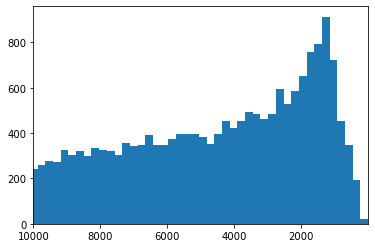

In [137]:
fig, ax = plt.subplots(1,1)
# fig.set_figheight(15)
# fig.set_figwidth(15)
# # ax.set_size_inches(10,15)
ax.set_xlim(10000)
ax.rev
ax.hist(df.palabras.values, bins=10000)

# data['pm2.5'].hist(bins=1000,grid=False)
# ax.set_xlabel("Palabras", fontsize=15)
# ax.set_ylabel("Documentos",fontsize=15)
plt.show()

In [139]:
np.argmax(df.palabras.values)

33328

In [145]:
print(df.iloc[np.argmax(df.palabras.values)].LINK)

https://www.corteconstitucional.gov.co/Relatoria/1996/C-037-96.htm


In [146]:
from bs4 import BeautifulSoup

In [148]:
main_soup = BeautifulSoup(df.iloc[np.argmax(df.palabras.values)].DOCUMENT, 'lxml')

In [149]:
main_soup.text

'LEY ESTATUTARIA JUSTICIA\n\n\n'

In [150]:
with open("sentencia_sucia.txt", "w") as f:
    f.write(df.iloc[np.argmax(df.palabras.values)].DOCUMENT)

In [35]:
X = ['mi mamá me mima', 'mi mamá me ama', 'amo a mi mamá']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vec = CountVectorizer(ngram_range=(1,3))
vec.fit(X)

CountVectorizer(ngram_range=(1, 3))

In [39]:
vec.vocabulary_

{'mi': 11,
 'mamá': 4,
 'me': 8,
 'mima': 14,
 'mi mamá': 12,
 'mamá me': 5,
 'me mima': 10,
 'mi mamá me': 13,
 'mamá me mima': 7,
 'ama': 0,
 'me ama': 9,
 'mamá me ama': 6,
 'amo': 1,
 'amo mi': 2,
 'amo mi mamá': 3}